In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed=  2002
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [3]:
X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test  = X_test.reshape(-1, 28, 28, 1) / 255.
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [4]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [5]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dropout, Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [12]:
del model

In [13]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape = (28, 28, 1), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4719104   
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                      

In [14]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [15]:
model_path='best_mnist_cnn_v2.h5'
mc = ModelCheckpoint(model_path, monitor='val_loss',save_best_only=True, verbose=1)
es = EarlyStopping(patience=5)

In [16]:
hist1 = model.fit(X_train, Y_train, validation_split=0.2,
                  epochs=1000, batch_size=200, verbose=0,
                  callbacks = [mc,es])


Epoch 1: val_loss improved from inf to 0.06767, saving model to best_mnist_cnn_v2.h5

Epoch 2: val_loss improved from 0.06767 to 0.04827, saving model to best_mnist_cnn_v2.h5

Epoch 3: val_loss improved from 0.04827 to 0.04328, saving model to best_mnist_cnn_v2.h5

Epoch 4: val_loss did not improve from 0.04328

Epoch 5: val_loss did not improve from 0.04328

Epoch 6: val_loss did not improve from 0.04328

Epoch 7: val_loss did not improve from 0.04328

Epoch 8: val_loss did not improve from 0.04328


In [17]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0434 - accuracy: 0.9883


[0.04342314228415489, 0.9883000254631042]

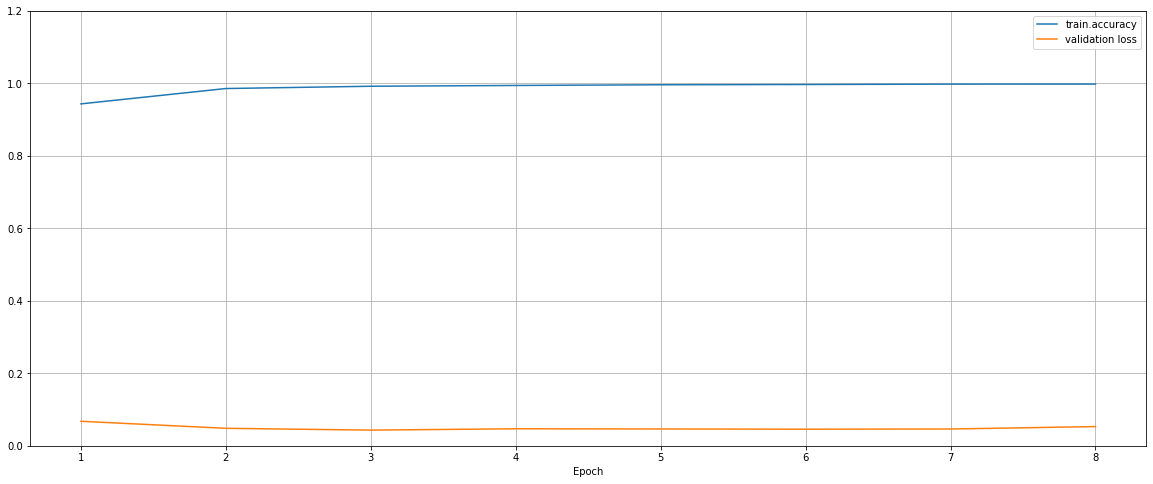

In [18]:
y_acc1 = hist1.history['accuracy']
y_vloss1 = hist1.history['val_loss']
xs1 = np.arange(1, len(y_acc1) + 1)
plt.figure(figsize=(20, 8))
plt.plot(xs1, y_acc1, label='train.accuracy')
plt.plot(xs1, y_vloss1, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.show()

In [30]:
model_path = 'best_mnist_cnn_v3.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [31]:
del model2

In [32]:
model2 = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape = (28, 28, 1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               4719104   
                                                      

In [33]:
model2.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [35]:
hist2 = model2.fit(X_train, Y_train, validation_split=0.2,
                  epochs=1000, batch_size=200, verbose=1,
                  callbacks=[mc, es])

Epoch 1/1000
240/240 [==============================] - ETA: 0s - loss: 0.2148 - accuracy: 0.9330
Epoch 1: val_loss did not improve from 0.05655
240/240 [==============================] - 4s 15ms/step - loss: 0.2148 - accuracy: 0.9330 - val_loss: 0.0575 - val_accuracy: 0.9838
Epoch 2/1000
240/240 [==============================] - ETA: 0s - loss: 0.0637 - accuracy: 0.9803
Epoch 2: val_loss improved from 0.05655 to 0.04623, saving model to best_mnist_cnn_v3.h5
240/240 [==============================] - 4s 16ms/step - loss: 0.0637 - accuracy: 0.9803 - val_loss: 0.0462 - val_accuracy: 0.9868
Epoch 3/1000
237/240 [============================>.] - ETA: 0s - loss: 0.0418 - accuracy: 0.9871
Epoch 3: val_loss improved from 0.04623 to 0.03952, saving model to best_mnist_cnn_v3.h5
240/240 [==============================] - 4s 15ms/step - loss: 0.0421 - accuracy: 0.9870 - val_loss: 0.0395 - val_accuracy: 0.9892
Epoch 4/1000
238/240 [============================>.] - ETA: 0s - loss: 0.0348 - accu

In [36]:
model2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0340 - accuracy: 0.9917


[0.033956609666347504, 0.9916999936103821]

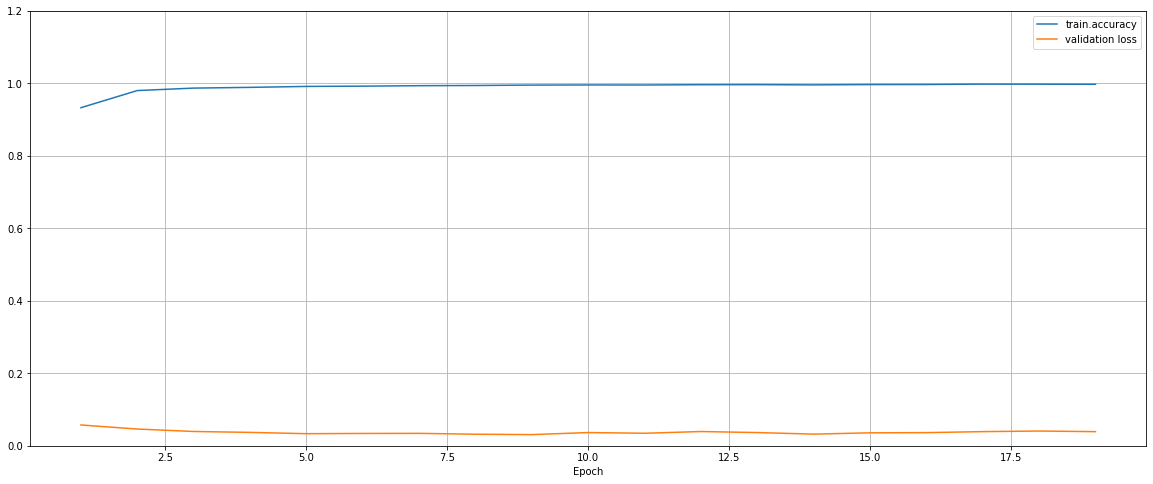

In [37]:
y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs1 = np.arange(1, len(y_acc2) + 1)
plt.figure(figsize=(20, 8))
plt.plot(xs1, y_acc2, label='train.accuracy')
plt.plot(xs1, y_vloss2, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.show()

# Fashion MNIST 손글씨 - CNN v1



- 2 x conv2D layers
- 1 FCN layer
- 1 Dropput
- MaxPooling2D
- l output layer

In [84]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape

(60000, 28, 28)

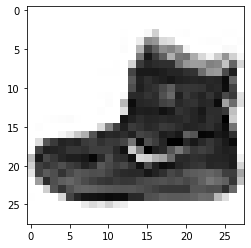

In [85]:
plt.imshow(X_train[0], cmap='Greys')

In [86]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

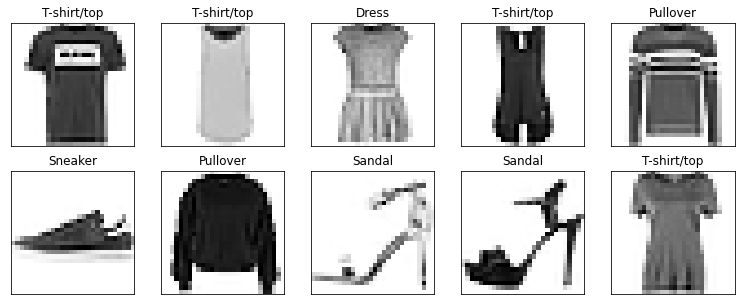

In [87]:
plt.figure(figsize=(13,5))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.imshow(X_train[i], cmap='Greys')
    plt.title(class_names[y_train[i]])
    plt.xticks([]), plt.yticks([])
plt.show()

In [88]:
X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1, 28, 28, 1) / 255.
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [89]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [90]:
del model

In [91]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_20 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_14 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_9 (Flatten)         (None, 9216)              0         
                                                                 
 dense_18 (Dense)            (None, 512)               4719104   
                                                      

In [92]:
model_path = 'best_fashion_mnist_cnn_v1.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [93]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [94]:
hist1 = model.fit(X_train, Y_train, validation_split=0.2,
                  epochs=1000, batch_size=200, verbose=1,
                  callbacks=[mc, es])

Epoch 1/1000
239/240 [============================>.] - ETA: 0s - loss: 0.4973 - accuracy: 0.8205
Epoch 1: val_loss improved from inf to 0.33993, saving model to best_fashion_mnist_cnn_v1.h5
240/240 [==============================] - 4s 16ms/step - loss: 0.4968 - accuracy: 0.8206 - val_loss: 0.3399 - val_accuracy: 0.8760
Epoch 2/1000
239/240 [============================>.] - ETA: 0s - loss: 0.3078 - accuracy: 0.8882
Epoch 2: val_loss improved from 0.33993 to 0.26695, saving model to best_fashion_mnist_cnn_v1.h5
240/240 [==============================] - 4s 15ms/step - loss: 0.3078 - accuracy: 0.8882 - val_loss: 0.2670 - val_accuracy: 0.9016
Epoch 3/1000
237/240 [============================>.] - ETA: 0s - loss: 0.2544 - accuracy: 0.9084
Epoch 3: val_loss improved from 0.26695 to 0.23986, saving model to best_fashion_mnist_cnn_v1.h5
240/240 [==============================] - 4s 15ms/step - loss: 0.2541 - accuracy: 0.9086 - val_loss: 0.2399 - val_accuracy: 0.9107
Epoch 4/1000
238/240 [=

In [95]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2737 - accuracy: 0.9289


[0.273735910654068, 0.9289000034332275]

In [96]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2172 - accuracy: 0.9230


[0.2172379195690155, 0.9229999780654907]

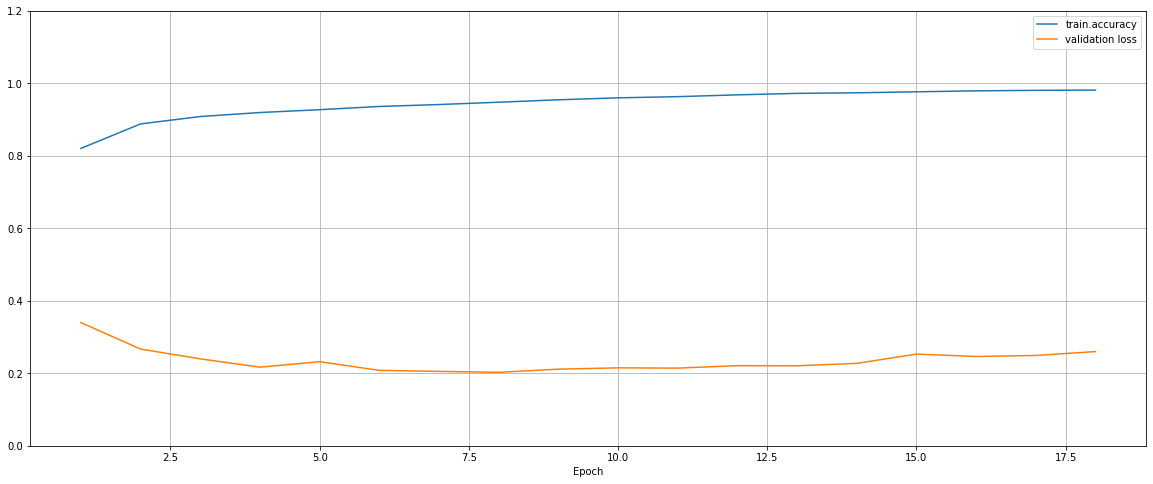

In [97]:
y_acc1 = hist1.history['accuracy']
y_vloss1 = hist1.history['val_loss']
xs1 = np.arange(1, len(y_acc1) + 1)
plt.figure(figsize=(20, 8))
plt.plot(xs1, y_acc1, label='train.accuracy')
plt.plot(xs1, y_vloss1, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.show()